   #                       Прогноз оттока клиентов из банка 
**Заказчик** - банк  «Бета-Банк».

**Цель** -  необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Построить модель с предельно большим значением F1-меры (довести метрику до 0.59).

**Входные данные от Заказчика**: 
- В нашем распоряжении предоставлены исторические данные о поведении клиентов и расторжении договоров с банком: 
  - `/datasets/Churn.csv`

### Описание данных

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
 Известно:
 
**Признак**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**

- `Exited` — факт ухода клиента

### План исследования:

- Изучение файла с данными
- Предобработка данных
- Исследовательский анализ 
    - исследование баланса классов, обучение модели без учёта дисбаланса.
- Улучшение качества модели, учитывая дисбаланс классов. Обучение разных моделей в поисках лучшей.    
- Финальное тестирование
- Общий вывод


### Изучение файлов с данными.

Начнем изучение наших данных с импортирования необходимых для выполнения исследования библиотек и распаковки файла.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
from pylab import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier


In [2]:
#распакуем файл
df_churn = pd.read_csv('C:/Users/Виталий/Desktop/практикум/7 проект/Churn.csv')
df_churn


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Посмотрим на краткую сводку данных

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Визуализируем пропущенные значения с помощью тепловой карты в таблице и в процентном соотношении


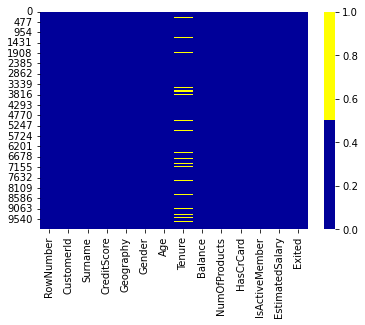

RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
Tenure             9.09
dtype: float64

In [4]:
cols = df_churn.columns[:14]
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df_churn[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()
df_churn.isnull().sum().sort_values()/df_churn.shape[0]*100

**Вывод**

    Датасет содержит 14 столбцов. Для дальнейшего исследования такие столбцы, как `RowNumber`, `CustomerId`, `Surname`, не потребуются, поэтому удалим их. Остальные столбцы приведем к общему регистру в наименовании.
    Так же необходимо избавиться от пропущенных значений.

### Предобработка данных

Посмотрим на наименования столбцов

In [5]:
df_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Удалим столбцы, которые для анализа не так важны

In [6]:
df_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Приведем к одному регистру наименования стобцов и переименуем

In [7]:
df_churn.columns = map(str.lower, df_churn.columns)
df_churn.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [8]:
df = df_churn.rename(columns={'creditscore': 'credit_score',
                              'numofproducts': 'num_of_products',
                              'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member',
                              'estimatedsalary': 'estimated_salary'})  # переименование столбцов

Проверим

In [9]:
df.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

Посмотрим, какие данные содержат пропуски в столбце `tenure`

In [10]:
df[df['tenure'].isnull()]

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Заменим пропущенные значения нулем, т.к. данные о том, сколько человек является клиентом банка, нам взять негде

In [11]:
df['tenure'] = df['tenure'].fillna(0)
df.isnull().sum().sort_values()/df_churn.shape[0]*100

credit_score        0.0
geography           0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
num_of_products     0.0
has_cr_card         0.0
is_active_member    0.0
estimated_salary    0.0
exited              0.0
dtype: float64

Проверим на наличие дубликатов

In [12]:
df.duplicated().sum()

0

**Вывод**

    Заменили пропущенные значения нулем, привели наименования столбцов к общему регистру, проверили на наличие дубликатов.   Данные готовы к дальнейшему исследованию

### Исследовательский анализ

#### Подготовка признаков

Посмотрим на описательную статистику данных

In [13]:
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Избавляемся от категориальных признаков методом One hot encoder

In [14]:
print(df['geography'].value_counts())
print(df['gender'].value_counts())
df_ohe=pd.get_dummies(df,drop_first=True)

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64
Male      5457
Female    4543
Name: gender, dtype: int64


In [15]:
df_ohe

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


**Средние значения относительно оттока**

Построим распределение признаков у тех, кто ушел и тех, кто остался.

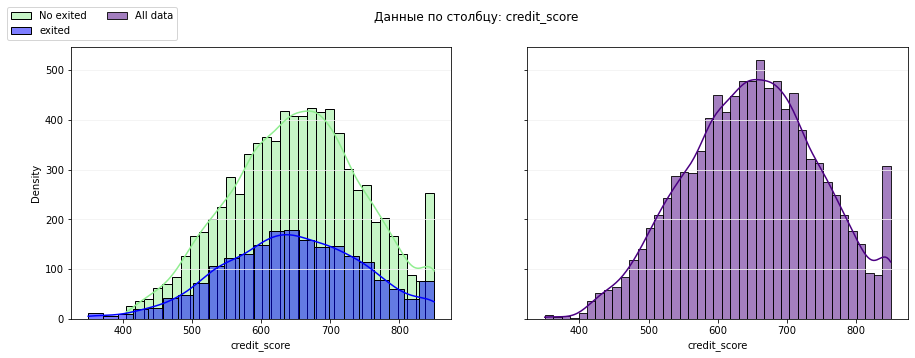

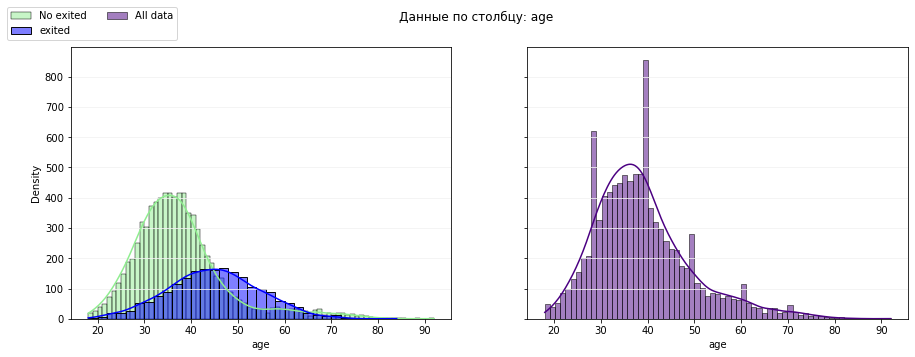

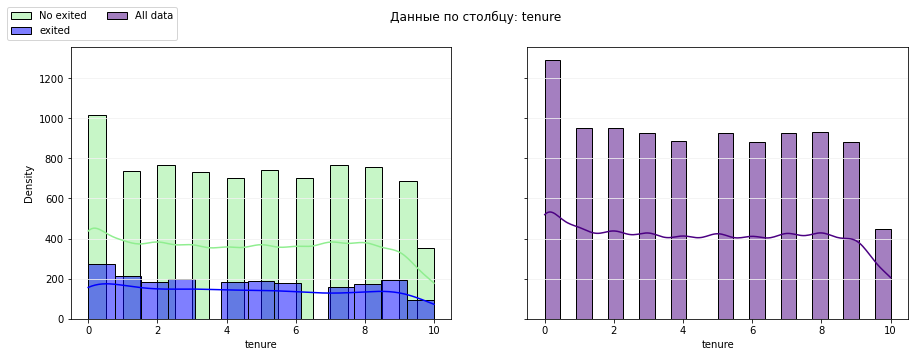

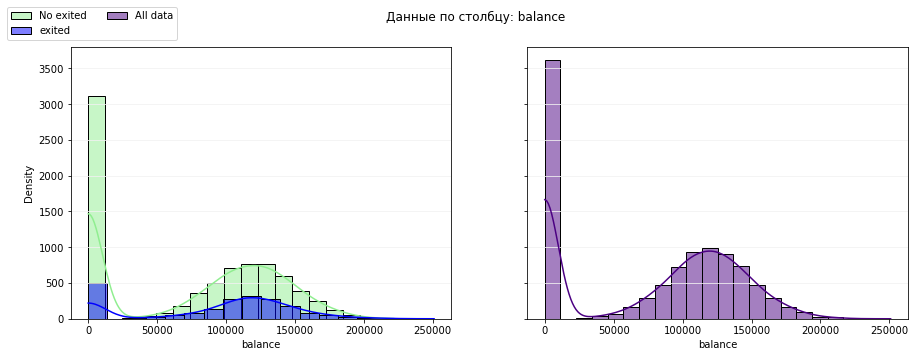

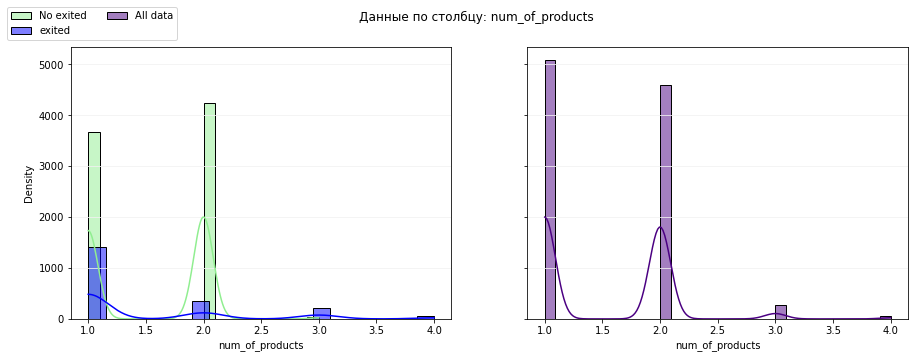

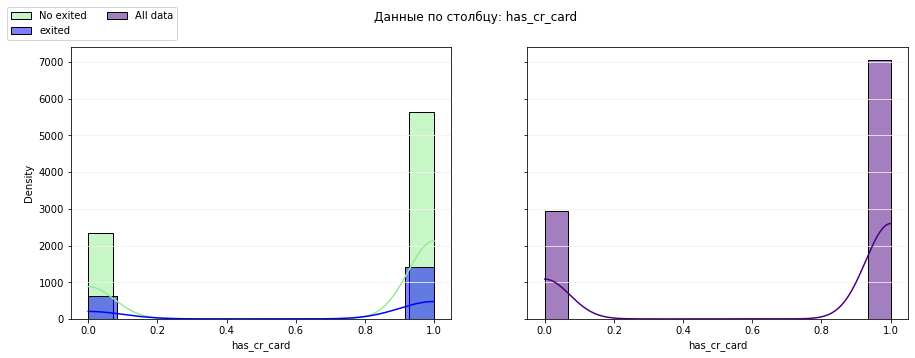

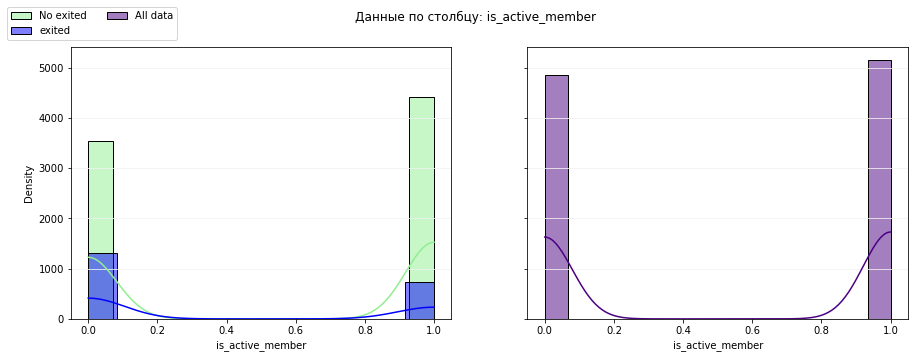

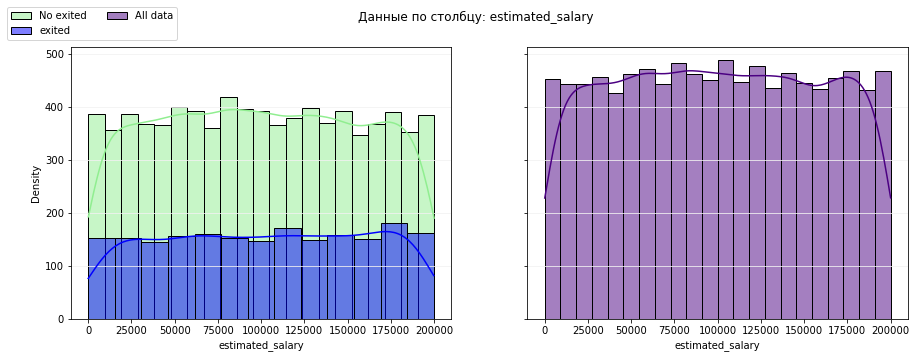

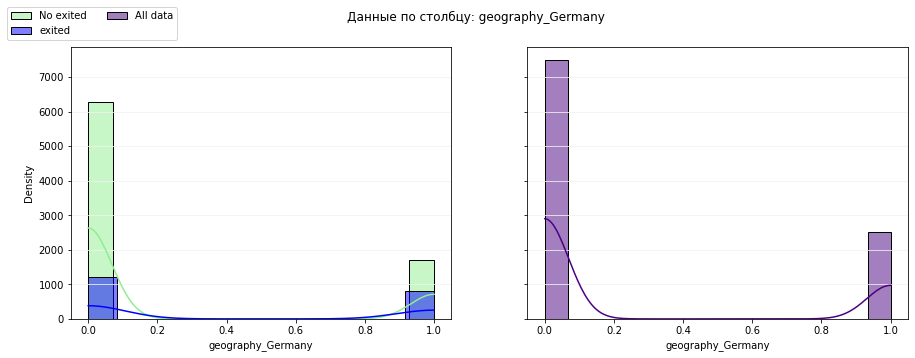

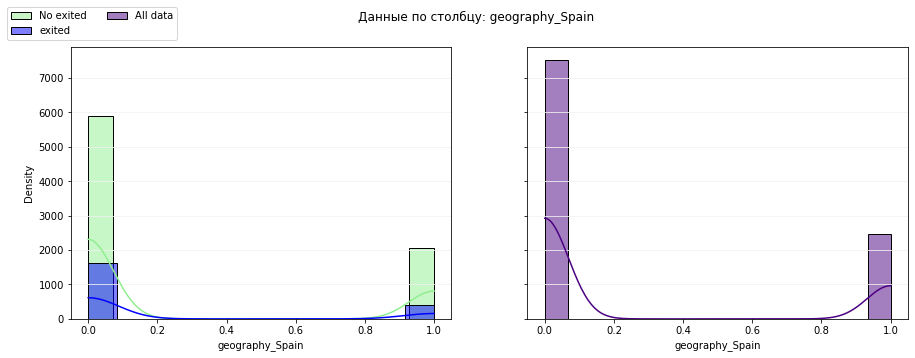

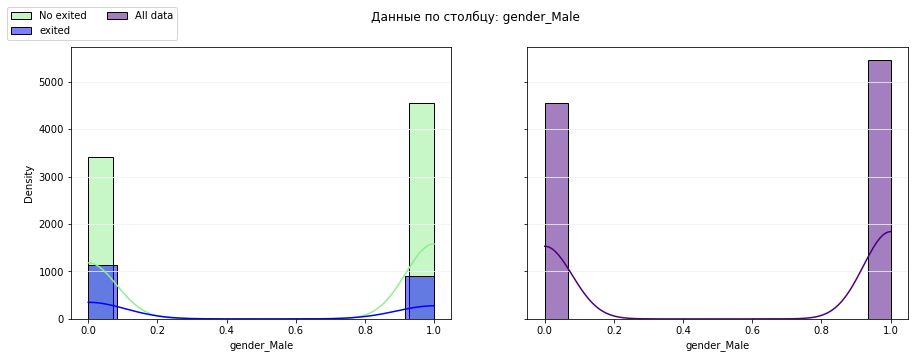

In [16]:
columns = df_ohe.drop(['exited'], axis=1).columns
for col in columns:
    x1 = df_ohe[df_ohe['exited'] == 0][col]
    x2 = df_ohe[df_ohe['exited'] == 1][col]
    x3 = df_ohe[col]
# plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + col)
    sns.histplot(x1, color="lightgreen",
                 ax=axes[0], label='No exited', kde=True)
    sns.histplot(x2, color="blue", ax=axes[0], label='exited', kde=True)
    sns.histplot(x3, color="indigo", ax=axes[1], label='All data', kde=True)
    fig.legend(bbox_to_anchor=(0.066, 0.9),
               loc='lower left', ncol=2, borderaxespad=0.)
    axes[0].set(ylabel='Density')
    axes[0].grid(axis='y', color='0.95')
    axes[1].grid(axis='y', color='0.95')
    plt.show()

По графикам можно заметить, что к оттоку более склонны женщины, а также на отток влияет возраст - уходят более возрастные клиенты.

In [17]:
df_ohe.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_Germany', 'geography_Spain', 'gender_Male'],
      dtype='object')

Для того, чтобы определить, какие факторы больше всего влияют на отток клиентов, сформируем корреляцию по данным столбцам и отобразим на тепловой карте

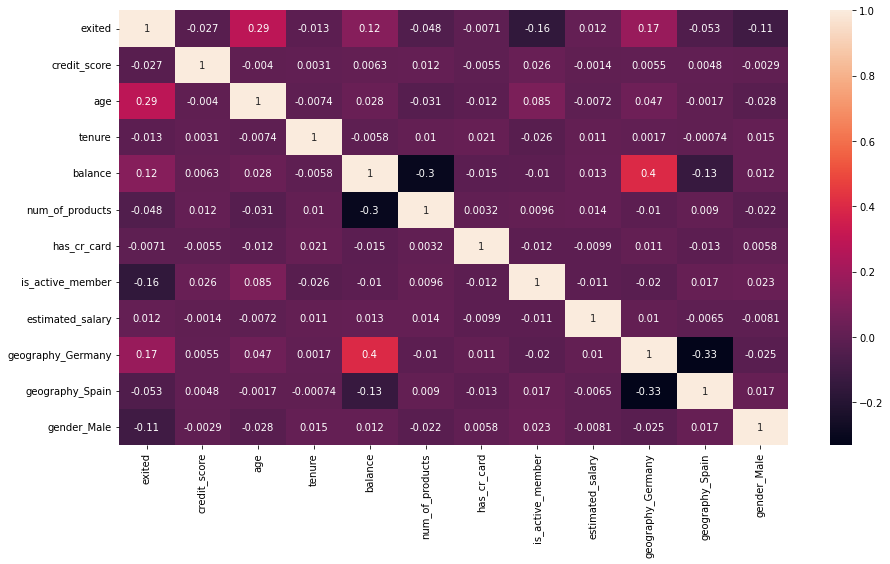

,exited,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
exited,1.000000,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,0.173488,-0.052667,-0.106512
credit_score,-0.027094,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.005538,0.004780,-0.002857
age,0.285323,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.046897,-0.001685,-0.027544
tenure,-0.013319,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,0.001676,-0.000745,0.014889
balance,0.118533,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.401110,-0.134892,0.012087
num_of_products,-0.047820,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.010419,0.009039,-0.021859
has_cr_card,-0.007138,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.010577,-0.013480,0.005766
is_active_member,-0.156128,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.020486,0.016732,0.022544
estimated_salary,0.012097,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.010297,-0.006482,-0.008112
geography_Germany,0.173488,0.005538,0.046897,0.001676,0.401110,-0.010419,0.010577,-0.020486,0.010297,1.000000,-0.332084,-0.024628


In [18]:
columns_corr = ['exited', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products',
                'has_cr_card', 'is_active_member', 'estimated_salary',
                'geography_Germany', 'geography_Spain', 'gender_Male']
# Отобразим на тепловой карте
plt.figure(figsize=(15, 8))
sns.heatmap(df_ohe[columns_corr].corr(), annot=True)
plt.show()
df_ohe[columns_corr].corr()

Мультиколлинеарности не обнаружено, все признаки незначительно коррелируют друг с другом. С целевой переменной `exited` больше всего коррелирует возраст, баланс на счёте, страна проживания/

Выполним разделение данных на две части, основной "features" и "target"
Разбиваем данные после OHE на четыре выборки train_features,valid_features,train_target,valid_target

In [19]:
target = df_ohe['exited']  # Целевой признак
features = df_ohe.drop(['exited'], axis=1)  # Признаки

Используем функцию train_test_split для разделения основного массива данных на три выборки 20% 20% 60%
Для начала отделим от основного массива данных 20% на тестовую выборку, для проверки моделей после обучения

In [20]:
features_df, features_test, target_df, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Выполним разделение оставшегося массива данных на две части 75% и 25% для построения и обучения модели

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_df, target_df, test_size=0.25, random_state=12345)

Проверим равномерность разделения данных при помощи функции shape

In [22]:
print(features.shape,
      features_df.shape,
      features_valid.shape,
      features_test.shape,
      features_train.shape)

(10000, 11) (8000, 11) (2000, 11) (2000, 11) (6000, 11)


In [23]:
print(target.shape,
      target_df.shape,
      target_valid.shape,
      target_test.shape,
      target_train.shape)

(10000,) (8000,) (2000,) (2000,) (6000,)


In [24]:
print(
    'Размер тренировочной выборки- {:.0%}'.format(target_valid.shape[0]/target.shape[0]))
print(
    'Размер валидационной выборки - {:.0%}'.format(target_train.shape[0]/target.shape[0]))
print(
    'Размер тестовой выборки - {:.0%}'.format(target_test.shape[0]/target.shape[0]))

Размер тренировочной выборки- 20%
Размер валидационной выборки - 60%
Размер тестовой выборки - 20%


Приведём данные столбцов `credit_score`, `age`, `tenure`,
           `balance`, `num_of_products`, `estimated_salary` к одному масштабу

In [25]:
numeric = ['credit_score', 'age', 'tenure',
           'balance', 'num_of_products', 'estimated_salary']

In [26]:
scaler = StandardScaler()
scaler.fit(features_df[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

C:\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Проверим равномерность распределения

In [27]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
features_train.head()

(6000, 11)
(2000, 11)
(2000, 11)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.121761,-0.083605,-0.175851,0.085871,0.811234,0,1,0.324543,0,0,0
6655,-0.999865,0.486915,-1.459730,0.145977,-0.899779,1,1,-0.731865,0,0,1
4287,0.653037,1.342695,-1.138760,0.367572,-0.899779,1,1,-0.481728,1,0,1
42,-0.979204,2.103389,-0.817791,0.660267,-0.899779,1,1,-0.106029,0,0,0
8178,0.580723,0.677088,0.787058,0.821325,0.811234,1,1,0.793552,0,0,0


**Вывод**

Объёмы данных из нашей таблицы распределены верно, согласно требованиям (60/20/20). Неоднородные данные приведены к одному масштабу. Посмотрим как ведут себя модели на наших даных.

#### Выбор моделей без учёта дисбаланса

Визуализируем процент оттока


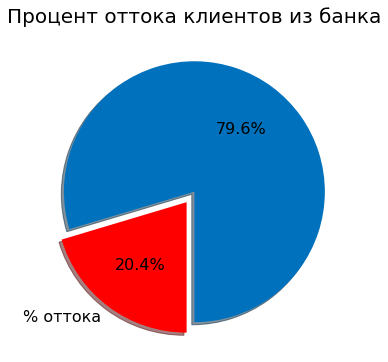

In [28]:
sizes = df_ohe['exited'].value_counts(sort=True)
colors = ['#0072BD', "#ff0000"]
labels = '', '% оттока'
explode = (0, 0.1)
rcParams['figure.figsize'] = 6, 6

# Plot
plt.pie(sizes, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270, textprops={'fontsize': 16})

plt.title('Процент оттока клиентов из банка', fontdict={'fontsize': 20})
plt.show()

Наблюдается сильный дисбаланс классов. Модель может испытывать проблемы с порогом точности/полноты. При подборе гиперпараметров надо учесть баланс классов.

#### Выбор моделей без учёта дисбаланса

Определим функцию, которая будет выводить метрики

In [29]:
def print_all_metrics(target_valid, predictions, probabilities, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(target_valid, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(target_valid, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(target_valid, predictions)))
    print('\tF1: {:.2f}'.format(f1_score(target_valid, predictions)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(target_valid, probabilities)))

**LogisticRegression**

Зададим алгоритм для модели **логистической регрессии**

In [30]:
%%time

lr_model = LogisticRegression(random_state=12345, solver='liblinear')
# обучим модель
lr_model.fit(features_train, target_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_result = lr_model.score(features_valid, target_valid)
lr_predictions = lr_model.predict(features_valid)
lr_probabilities = lr_model.predict_proba(features_valid)[:, 1]
print('Наилучшее качество модели {:.2f}'.format(lr_result))

Наилучшее качество модели 0.82
Wall time: 23 ms


**DecisionTreeClassifier**

Выберем лучшие гипрепараметры для модели **Дерево решений**

In [31]:
%%time

best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
for depth in range(1, 90, 2):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    tree_model.fit(features_train, target_train)
    result_dt = tree_model.score(features_valid, target_valid)
    if result_dt > best_result_dt:
        best_model_dt = tree_model
        best_result_dt = result_dt

        best_depth_dt = depth

print('Наилучшее качество модели {:.2f} с максимальной глубиной {}'.format(
    best_result_dt, best_depth_dt))

Наилучшее качество модели 0.86 с максимальной глубиной 7
Wall time: 1.37 s


In [32]:
# Модель на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(max_depth=7, random_state=12345)
tree_model.fit(features_train, target_train)
tree_predictions = tree_model.predict(features_valid)
tree_probabilities = tree_model.predict_proba(features_valid)[:, 1]

**RandomForestClassifier**

Выберем лучшие гипрепараметры для модели **Cлучайный лес**

In [33]:
%%time

best_est_rf = 0
best_model_rf = None
best_result_rf = 0
best_depth_rf = 0
for est in range(10, 60, 10):
    for depth in range(1, 60, 2):

        rf_model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth)
        rf_model.fit(features_train, target_train)
        result_rf = rf_model.score(features_valid, target_valid)
        if result_rf > best_result_rf:
            best_model_rf = rf_model
            best_result_rf = result_rf
            best_est_rf = est
            best_depth_rf = depth

print('Наилучшее качество модели {:.2f} при количестве деревьев {} с максимальной глубиной {}'.format(
    best_result_rf, best_est_rf, best_depth_rf))

Наилучшее качество модели 0.87 при количестве деревьев 40 с максимальной глубиной 13
Wall time: 32.5 s


In [34]:
# Модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(
    max_depth=13, n_estimators=40, random_state=12345)
rf_model.fit(features_train, target_train)
rf_predictions = rf_model.predict(features_valid)
rf_probabilities = rf_model.predict_proba(features_valid)[:, 1]

Выведем все метрики

In [35]:
print_all_metrics(target_valid, lr_predictions, lr_probabilities,
                  title='Метрики для модели логистической регрессии:')
print_all_metrics(target_valid, tree_predictions,
                  tree_probabilities, title='Метрики для модели дерева решений:')
print_all_metrics(target_valid, rf_predictions, rf_probabilities,
                  title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.82
	Precision: 0.58
	Recall: 0.21
	F1: 0.31
	ROC_AUC: 0.77
Метрики для модели дерева решений:
	Accuracy: 0.86
	Precision: 0.72
	Recall: 0.45
	F1: 0.55
	ROC_AUC: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.87
	Precision: 0.77
	Recall: 0.46
	F1: 0.57
	ROC_AUC: 0.84


Матрица предсказаний наилучшей модели без учёта дисбаланса данных

In [36]:
print(confusion_matrix(target_valid, tree_predictions))

[[1541   68]
 [ 217  174]]


Посмотрим, какой из признаков в модели Случайный лес наиболее важный



In [37]:
importances = pd.DataFrame(
    {'feature': features.columns, 'importance': rf_model.feature_importances_})
importances.sort_values(by='importance', ascending=False)

,feature,importance
1,age,0.258372
4,num_of_products,0.154351
3,balance,0.135183
0,credit_score,0.125894
7,estimated_salary,0.125164
2,tenure,0.066626
6,is_active_member,0.050615
8,geography_Germany,0.037571
10,gender_Male,0.019139
5,has_cr_card,0.015300


Визуализуируем значимость признаков

<Figure size 864x432 with 0 Axes>

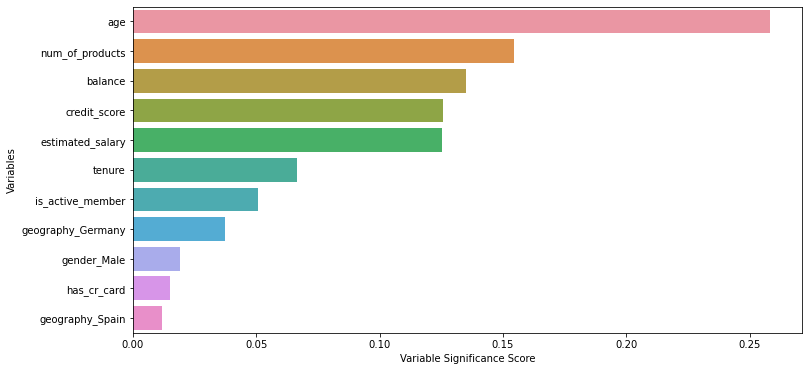

<Figure size 864x432 with 0 Axes>

In [38]:
feature_imp=pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variable Significance Score')
plt.ylabel('Variables')
plt.title("")
plt.figure(figsize=(12,6))

**Вывод**

Рассматривая данные с дисбалансом тремя моделями можно сделать вывод, что самая лучшая модель оказалась модель Случайного леса, в то время как Логистическая регрессия не справилась с требованием и при высоком accuracy, значение F1 оказалось равным '0.31'. Но до требуемого значения меры F1 более 0,59 нам ещё далеко. Узнаем на сколько качественно распределены данные в этих выборках в следующей главе.
Самый важный признак для модели Случайного леса  - age(возраст), как и определили выше. Модель можно использовать, например, для сравнения прогнозного значения продуктов и фактического. Тем, у кого прогнозное значение больше, можно предложить новый продукт. С помощью модели также можно предотвратить отток тех, кому она предсказывает уход, но клиент еще не успел.

### Улучшение качества модели, учитывая дисбаланс классов. 

#### Обучение разных моделей в поисках лучшей


Первый способ улучшить качество модели, учитывая дисбаланс классов, это установить параметр модели - balanced

**LogisticRegression**

In [39]:
# зададим алгоритм для модели логистической регрессии
lr_model_b = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
# обучим модель
lr_model_b.fit(features_train, target_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions_b = lr_model_b.predict(features_valid)
lr_probabilities_b = lr_model_b.predict_proba(features_valid)[:, 1]

**DecisionTree**

In [40]:
# Модель на основе алгоритма решающего дерева
tree_model_b = DecisionTreeClassifier(
    max_depth=7, random_state=12345, class_weight='balanced')

tree_model_b.fit(features_train, target_train)
tree_predictions_b = tree_model_b.predict(features_valid)
tree_probabilities_b = tree_model_b.predict_proba(features_valid)[:, 1]

**RandomForest**

In [41]:
# Модель на основе алгоритма случайного леса
rf_model_b = RandomForestClassifier(
    max_depth=13, n_estimators=40, random_state=12345, class_weight='balanced')

rf_model_b.fit(features_train, target_train)
rf_predictions_b = rf_model_b.predict(features_valid)
rf_probabilities_b = rf_model_b.predict_proba(features_valid)[:, 1]

Выведем все метрики

In [42]:
print_all_metrics(target_valid, lr_predictions_b, lr_probabilities_b,
                  title='Метрики для модели логистической регрессии c балансом:')
print_all_metrics(target_valid, tree_predictions_b,
                  tree_probabilities_b, title='Метрики для модели дерева решений с балансом:')
print_all_metrics(target_valid, rf_predictions_b, rf_probabilities_b,
                  title='Метрики для модели случайного леса  с балансом:')

Метрики для модели логистической регрессии c балансом:
	Accuracy: 0.71
	Precision: 0.37
	Recall: 0.68
	F1: 0.48
	ROC_AUC: 0.77
Метрики для модели дерева решений с балансом:
	Accuracy: 0.78
	Precision: 0.46
	Recall: 0.70
	F1: 0.55
	ROC_AUC: 0.80
Метрики для модели случайного леса  с балансом:
	Accuracy: 0.87
	Precision: 0.72
	Recall: 0.53
	F1: 0.61
	ROC_AUC: 0.84


Второй способ борьбы с дисбалансом данных - увеличение и уменьшение количества  классов

Создадим функцию, для увеличения выборки по первому [1] классу данных и уменьшению выборки по нулевому [0] классу

In [43]:
def down_up_sample(features, target, fraction, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_down_up = pd.concat([features_zeros.sample(
        frac=fraction, random_state=12345)] + [features_ones]*repeat)
    target_down_up = pd.concat([target_zeros.sample(
        frac=fraction, random_state=12345)] + [target_ones]*repeat)

    features_down_up_sampled, target_down_up_sampled = shuffle(
        features_down_up, target_down_up, random_state=12345)

    return features_down_up_sampled, target_down_up_sampled


features_upsampled, target_upsampled = down_up_sample(
    features_train, target_train, 0.5, 2)

Проверим баланс распределения классов

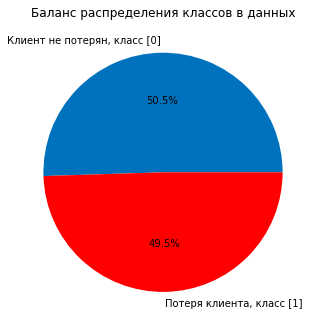

In [44]:
colors = ['#0072BD', "#ff0000"]
target_upsampled.value_counts(normalize=True).plot(kind='pie', figsize=[
    5.5, 5.5], legend=False, autopct='%1.1f%%', colors=colors, labels=['Клиент не потерян, класс [0]', 'Потеря клиента, класс [1]'])
plt.title('Баланс распределения классов в данных')
# plt.xlabel('Класс')
plt.ylabel('')
plt.show()

Проверим данные на наших моделях


**LogisticRegression**

In [45]:
# зададим алгоритм для модели логистической регрессии
lr_model_d = LogisticRegression(random_state=12345, solver='liblinear')
# обучим модель
lr_model_d.fit(features_upsampled, target_upsampled)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions_d = lr_model_d.predict(features_valid)
lr_probabilities_d = lr_model_d.predict_proba(features_valid)[:, 1]

**DecisionTree**

In [46]:
# Модель на основе алгоритма решающего дерева
tree_model_d = DecisionTreeClassifier(max_depth=6, random_state=12345)
tree_model_d.fit(features_upsampled, target_upsampled)
tree_predictions_d = tree_model_d.predict(features_valid)
tree_probabilities_d = tree_model_d.predict_proba(features_valid)[:, 1]

**RandomForest**

In [47]:
best_est = 0
best_model = None
best_result = 0
best_depth = 0
for est in range(10, 60, 10):
    for depth in range(1, 60, 2):

        rf_model_ = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth)
        rf_model_.fit(features_upsampled, target_upsampled)
        result_rf_ = rf_model_.score(features_valid, target_valid)
        if result_rf_ > best_result:
            best_model = rf_model_
            best_result = result_rf_
            best_est = est
            best_depth = depth

print('Наилучшее качество модели {:.2f} при количестве деревьев {} с максимальной глубиной {}'.format(
    best_result, best_est, best_depth))

Наилучшее качество модели 0.81 при количестве деревьев 20 с максимальной глубиной 19


In [48]:
# Модель на основе алгоритма случайного леса
rf_model_d = RandomForestClassifier(
    max_depth=19, n_estimators=20, random_state=12345)
rf_model_d.fit(features_upsampled, target_upsampled)
rf_predictions_d = rf_model_d.predict(features_valid)
rf_probabilities_d = rf_model_d.predict_proba(features_valid)[:, 1]

Выведем все метрики

In [49]:
print_all_metrics(target_valid, lr_predictions_d, lr_probabilities_d,
                  title='Метрики для модели логистической регрессии:')
print_all_metrics(target_valid, tree_predictions_d,
                  tree_probabilities_d, title='Метрики для модели дерева решений:')
print_all_metrics(target_valid, rf_predictions_d, rf_probabilities_d,
                  title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.70
	Precision: 0.36
	Recall: 0.69
	F1: 0.47
	ROC_AUC: 0.77
Метрики для модели дерева решений:
	Accuracy: 0.77
	Precision: 0.44
	Recall: 0.75
	F1: 0.56
	ROC_AUC: 0.81
Метрики для модели случайного леса:
	Accuracy: 0.81
	Precision: 0.51
	Recall: 0.64
	F1: 0.57
	ROC_AUC: 0.83


Матрица предсказаний наилучшей модели c учётом дисбаланса данных

In [50]:
print(confusion_matrix(target_valid, rf_predictions_d))

[[1371  238]
 [ 142  249]]


**Вывод**

По результату сравнения трёх моделей лучшей моделью по показателю метрики F1 показала себя модель Случайный лес(RandomForest) со значением F1=0.61 при установке параметра "balanced", а при уменьшении и увеличении классов - F1=0.57. Для дальнейшего тестирования выберем способ для регулировки дисбаланса с установкой параметра "balanced"

#### Определим порог классификации для модели RandomForest

In [51]:
print("Вероятность положительного класса:", rf_probabilities_b[:5])

Вероятность положительного класса: [0.27554328 0.62527746 0.08073967 0.69887577 0.71497744]


Переберем значения порогов от 0 до 0.7 с шагом 0.02. Найдём для каждого значения точность и полноту

In [52]:
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = rf_probabilities_b > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.196, Полнота = 1.000, F1 = 0.328
Порог = 0.02 | Точность = 0.205, Полнота = 0.992, F1 = 0.340
Порог = 0.04 | Точность = 0.222, Полнота = 0.980, F1 = 0.362
Порог = 0.06 | Точность = 0.238, Полнота = 0.967, F1 = 0.382
Порог = 0.08 | Точность = 0.255, Полнота = 0.959, F1 = 0.403
Порог = 0.10 | Точность = 0.272, Полнота = 0.939, F1 = 0.421
Порог = 0.12 | Точность = 0.291, Полнота = 0.921, F1 = 0.443
Порог = 0.14 | Точность = 0.313, Полнота = 0.910, F1 = 0.466
Порог = 0.16 | Точность = 0.335, Полнота = 0.887, F1 = 0.486
Порог = 0.18 | Точность = 0.353, Полнота = 0.864, F1 = 0.501
Порог = 0.20 | Точность = 0.367, Полнота = 0.831, F1 = 0.509
Порог = 0.22 | Точность = 0.391, Полнота = 0.813, F1 = 0.528
Порог = 0.24 | Точность = 0.406, Полнота = 0.785, F1 = 0.535
Порог = 0.26 | Точность = 0.429, Полнота = 0.762, F1 = 0.549
Порог = 0.28 | Точность = 0.446, Полнота = 0.734, F1 = 0.555
Порог = 0.30 | Точность = 0.477, Полнота = 0.726, F1 = 0.575
Порог = 0.32 | Точность 

Изобразим на графике, как выглядят значения метрик при изменении порога.

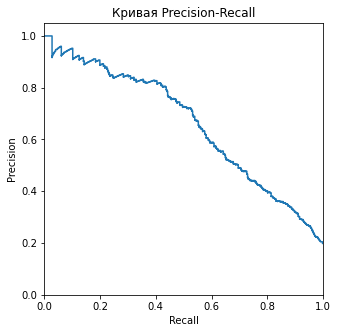

In [53]:
precision, recall, thresholds = precision_recall_curve(target_valid, rf_probabilities_b)
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Пороговое значение 0,5 выглядит наиболее оптимальным для нашей модели

In [54]:
predicted_rf_threshold = (rf_probabilities_b > 0.5)*1
predicted_rf_threshold.shape

(2000,)

Выведем метрики

In [55]:
f1_random_forest_t = f1_score(target_valid, predicted_rf_threshold)
print(classification_report(target_valid, predicted_rf_threshold))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1609
           1       0.72      0.53      0.61       391

    accuracy                           0.87      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



#### Исследование метрики AUC-ROC


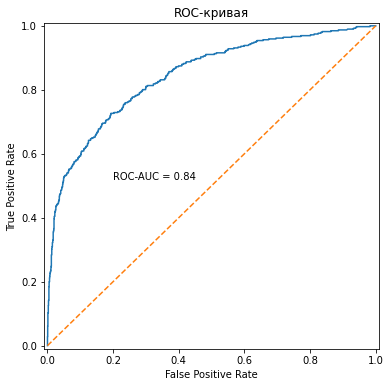

In [56]:
fpr, tpr, thresholds = roc_curve(target_valid, rf_probabilities_b)
auc_roc = roc_auc_score(target_valid, rf_probabilities_b)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.text(0.2, 0.52, 'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Наша модель RandomForest достаточно сильно отличается от случайной. Это видно по высоте кривой. Площадь под ROC-кривой — AUC-ROC=0.84, тогда как площадь случайно модели равна 0.5.

**Вывод**

Увеличение и уменьшение классов в выборке в целом  не показал лучшие результаты по улучшению метрики F1, а  лучшее влияние оказал параметр сlass_weight='balanced'. При увеличении и уменьшении классов в выборке полнота и точность у модели Случайный лес уменьшилась и увеличилась соответственно по сравнению с применением параметра 'balanced' 

Лучшей моделью на валидационной выборке можно легко назвать Random Forest, еще до учета дисбаланса это модель выдает на 0.1+ лучше показатель F1 и также имеет самый высокий AUC_ROC в 0.84 и для нее лучшей балансировкой  со значением f1=0.61 стала установка параметра "balanced".

### Финальное тестирование

Протестируем нашу лучшую модель Случайный лес (RandomForest)

In [57]:
model_test = RandomForestClassifier(
    max_depth=13, n_estimators=40, random_state=12345, class_weight='balanced')

model_test.fit(features_train, target_train)
predictions_test = model_test.predict(features_test)
probabilities_test = model_test.predict_proba(features_test)[:, 1]

print_all_metrics(target_test, predictions_test, probabilities_test,
                  title='Метрики для модели случайного леса с балансом:')

Метрики для модели случайного леса с балансом:
	Accuracy: 0.85
	Precision: 0.70
	Recall: 0.51
	F1: 0.59
	ROC_AUC: 0.85


Исследование метрики AUC-ROC для тестовой модели

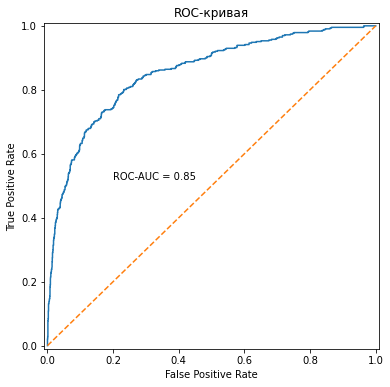

In [58]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)
auc_roc = roc_auc_score(target_test, probabilities_test)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.text(0.2, 0.52, 'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Наша тестовая модель RandomForest достаточно сильно отличается от случайной. Это видно по высоте кривой. Площадь под ROC-кривой — AUC-ROC=0.85, тогда как площадь случайно модели равна 0.5.

Проверим тестовую модель на адекватность  при помощи DummyClassifier

In [59]:
dummy_clf = DummyClassifier(strategy="most_frequent",random_state=12345)
dummy_clf.fit(features_test, target_test)

predict_dummy = dummy_clf.predict(features_test)
f1_dummy = f1_score(target_test,predict_dummy)
accurcy_dummy = dummy_clf.score(target_test,predict_dummy)
print('F1 константной модели: {:.2f}'.format(f1_dummy))
print('Accuracy константной модели: {:.2f}'.format(accurcy_dummy))

F1 константной модели: 0.00
Accuracy константной модели: 1.00


**Вывод**

 На тестовой выборке наша модель показала, что способна давать предсказания с качестовом accuracy = 0.85 при этом держать показатель меры F1 на уровне 0.59. 
Для проверки адекватности нашей модели мы провели сравнение с константной моделью DummyClassifier, где при значении accuracy = 1, значение меры F1 = 0.0, что говорит о том, что наша модель прошла проверку на адекватность.


### Общий вывод

In [60]:
rezult = {'LogisticRegression_balanced': np.array([0.71, 0.37, 0.68, 0.48, 0.77]), 'DecisionTree_balanced': np.array(
    [0.78, 0.46, 0.70, 0.55, 0.80]), 'RandomForest_balanced': np.array(
    [0.87, 0.72, 0.53, 0.61, 0.84]), 'RandomForest_balanced_test': np.array(
    [0.85, 0.70, 0.51, 0.59, 0.85])}
rezult_df = pd.DataFrame(
    rezult, index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])
rezult_df

,LogisticRegression_balanced,DecisionTree_balanced,RandomForest_balanced,RandomForest_balanced_test
Accuracy,0.71,0.78,0.87,0.85
Precision,0.37,0.46,0.72,0.70
Recall,0.68,0.70,0.53,0.51
F1,0.48,0.55,0.61,0.59
ROC_AUC,0.77,0.80,0.84,0.85


Целью исследования была задача создать модели, предсказывающей поведение клиентов: уйдёт клиент из банка в ближайшее время или нет. В нашем распоряжении были исторические данные о поведении клиентов и расторжении договоров с банком.

На этапе подготовки данных для обучения моделей была проведена работа по изучению качества данных и баланса распределения классов. Так же были применены способы приведения разномерных данных к одному масштабу для более качественного обучения наших моделей.

В ходе проверки трех различных алгоритмов машинного обучения мы исследовали различные способы устранения дисбаланса  с применением циклов по подбору гиперпараметров по каждой модели в отдельности. Наилучшей оказалась модель RandomForest(как видно из таблицы) со следующими параметрами: количество деревьев 40, глубина 13, а также c интересующим нас показателем F1 = 0.61, и показали отношение показателей True Positve и False Positive на графике, на котором наша модель имеет показатель ROC-AUC = 0.84.

В завершении выбора наилучшей модели, мы дополнительно проверили на адекватность нашу тестовую модель, доказав, что модель вменяема.

